# Imports

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
%pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN


Note: you may need to restart the kernel to use updated packages.


Loading Dataset

# Importing dataset

In [296]:
# # Read the file with the specified encoding
# try:
#     df = pd.read_csv('/content/gdrive/MyDrive/loan_approval_dataset.csv', delimiter=',', encoding='utf-8')
# except UnicodeDecodeError:
#     # If decoding fails, try reading the file with a different encoding
#     df = pd.read_csv('/content/gdrive/MyDrive/loan_approval_dataset.csv', delimiter=',', encoding='latin-1')

df = pd.read_csv('/Users/ingo/Downloads/loan_approval_dataset.csv', encoding= 'latin-1')

In [297]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


# Cleaning Data

Checking for duplicates

In [299]:
df.duplicated().sum()

0

Checking for null values


In [300]:
df.isna().sum() / len(df)

loan_id                      0.0
 no_of_dependents            0.0
 education                   0.0
 self_employed               0.0
 income_annum                0.0
 loan_amount                 0.0
 loan_term                   0.0
 cibil_score                 0.0
 residential_assets_value    0.0
 commercial_assets_value     0.0
 luxury_assets_value         0.0
 bank_asset_value            0.0
 loan_status                 0.0
dtype: float64

# Mapping/Encoding (Converting to 0s and 1s)

In [301]:
df['loan_status_numeric'] = df[' loan_status'].map({' Approved': 1, ' Rejected': 0})

df['education_numeric'] = df[' education'].map({' Graduate': 1, ' Not Graduate': 0})

df['self_employed_numeric'] = df[' self_employed'].map({' Yes': 1, ' No': 0})
columns_to_drop = ['loan_id', ' loan_status',' education',' self_employed',]
df = df.drop(columns=columns_to_drop, axis=1)


In [302]:
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status_numeric,education_numeric,self_employed_numeric
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,1,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,0,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,1,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,1,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,0,1


# QQ plot (before normalizing)

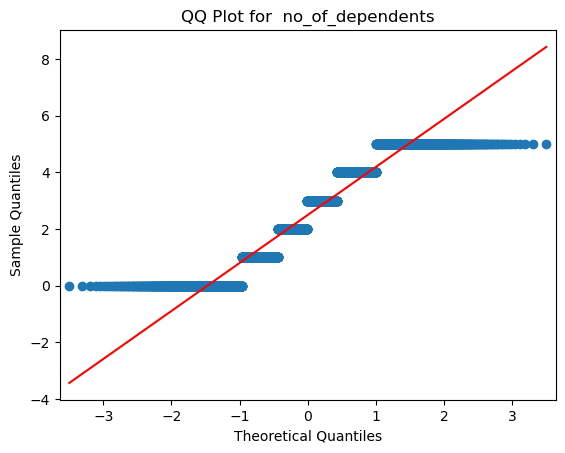

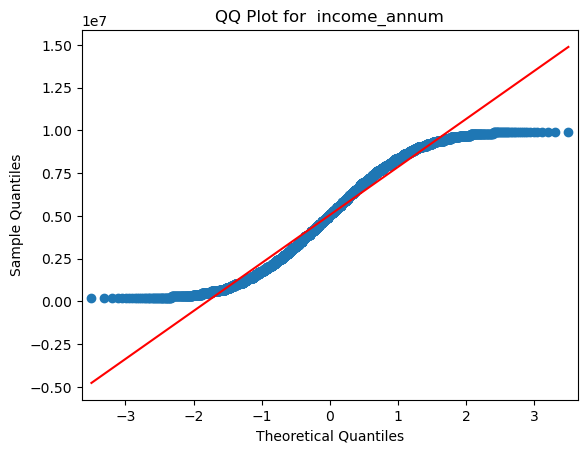

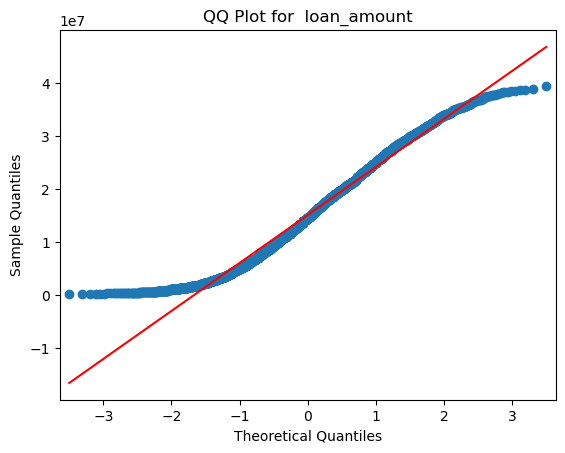

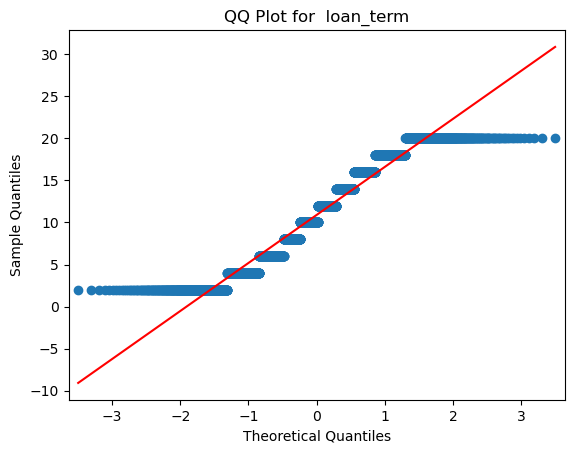

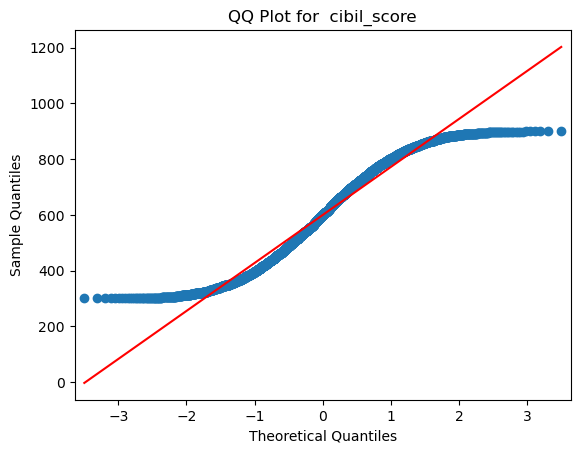

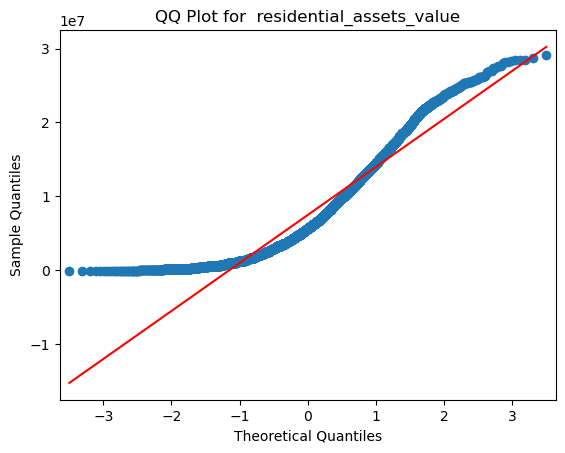

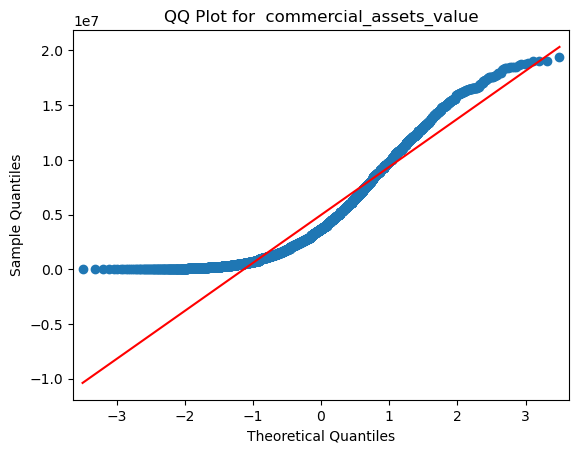

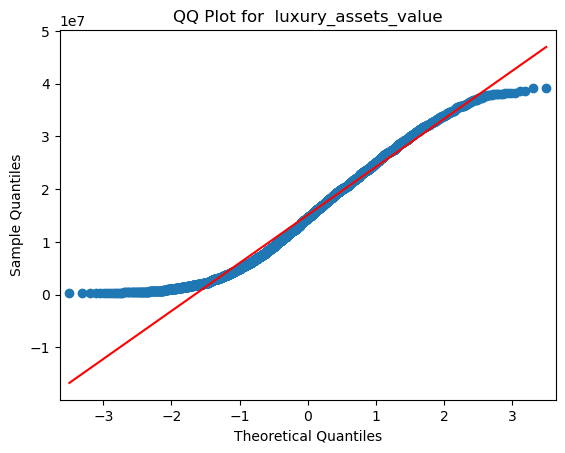

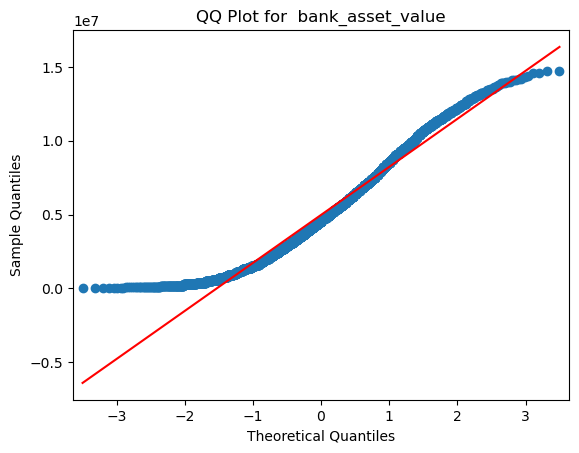

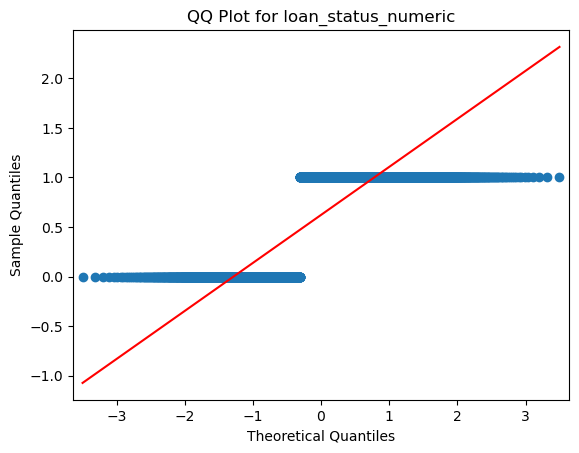

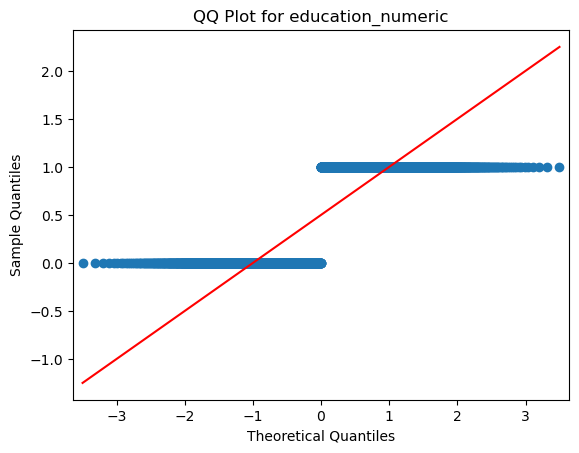

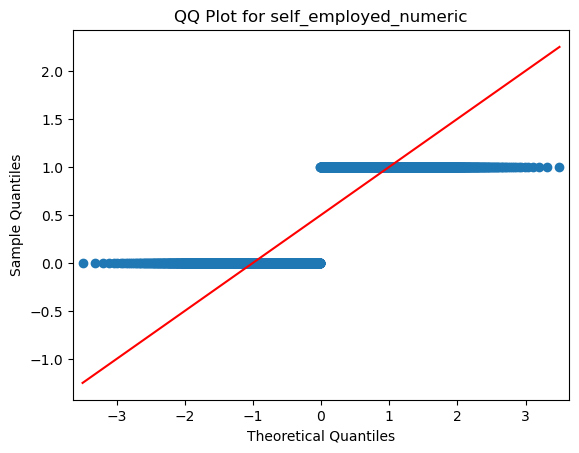

In [303]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
for column in df.columns:
    # Create a QQ plot for the current column
    sm.qqplot(df[column], line='s')
    plt.title(f'QQ Plot for {column}')
    plt.show()

# Normalization


In [304]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Check if each column is normalized
for column in df.columns:
    min_val = df[column].min()
    max_val = df[column].max()

    # Column is not normalized, normalize it
    scaler = MinMaxScaler()
    df[column] = scaler.fit_transform(df[[column]])

# Now, df contains the normalized and standardized values


In [305]:
df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status_numeric,education_numeric,self_employed_numeric
0,0.4,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,1.0,1.0,0.0
1,0.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,0.0,0.0,1.0
2,0.6,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,0.0,1.0,0.0
3,0.6,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,0.0,1.0,0.0
4,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,0.0,0.0,1.0


# PCA 

# PCA on dataset with target (y)

Explained Variance Ratio for each component:
[0.21252258 0.19168489 0.18577086 0.17753968 0.08391129 0.07276271
 0.02142637 0.01920101 0.01884143 0.0087234  0.00541764 0.00219814]


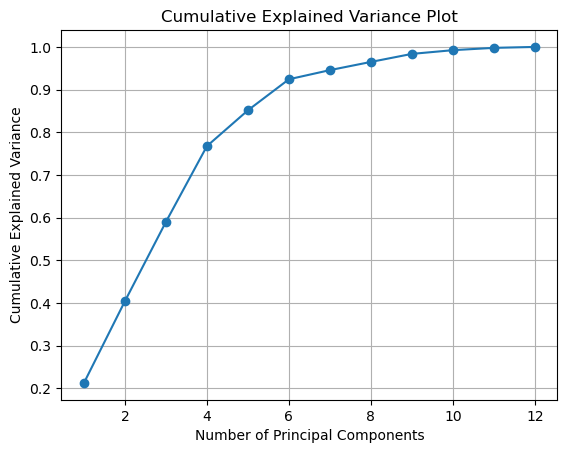

In [306]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import scipy.stats as stats
X = df
# Perform PCA
from sklearn.decomposition import PCA
import numpy as np

# Assuming X is your feature matrix
pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Print or use the explained variance ratio
print("Explained Variance Ratio for each component:")
print(explained_variance_ratio)

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()


##  Bar plot

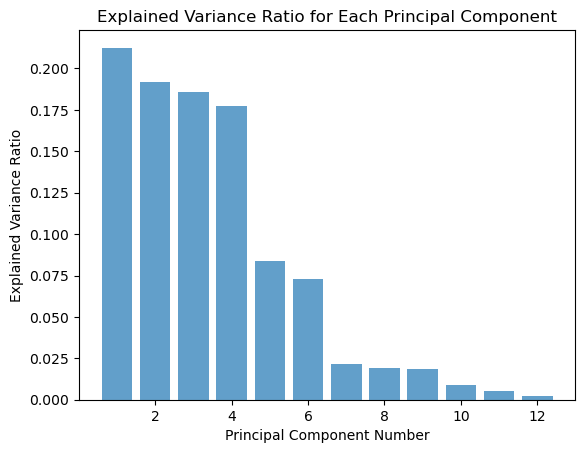

In [307]:
# Bar graph for explained variance ratio
component_numbers = range(1, len(explained_variance_ratio) + 1)
plt.bar(component_numbers, explained_variance_ratio, align='center', alpha=0.7)
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()


In [308]:
# Assuming you want to retain 95% of the total variance
desired_variance = 0.95

# Find the number of components needed to achieve the desired variance
n_components_needed = np.argmax(cumulative_variance >= desired_variance) + 1
n_components_needed

print("Components needed" )
print(+ n_components_needed)
pca = PCA(n_components=n_components_needed)
X_pca = pca.fit_transform(X)

Components needed
8


In [309]:
X_pca

array([[-0.40619459,  0.91295045, -0.50110662, ...,  0.08683891,
         0.57128694, -0.08850701],
       [ 0.64691993, -0.51754047,  0.58913435, ..., -0.29095957,
         0.0155604 ,  0.03598233],
       [ 0.73005901,  0.85190257, -0.53159776, ...,  0.48126568,
        -0.01025514,  0.21879974],
       ...,
       [ 0.71777526,  0.17863217,  0.02026821, ...,  0.31733017,
         0.42043032, -0.00289411],
       [-0.49638276, -0.15060253, -0.04032657, ..., -0.15312327,
        -0.18766049, -0.0025853 ],
       [-0.25411257,  1.17864002, -0.43989576, ..., -0.08870088,
        -0.00753769,  0.07935369]])

# PCA on dataset WITHOUT target (y)

Explained Variance Ratio for each component:
[0.23149698 0.22415274 0.21417327 0.10124969 0.08799278 0.07237888
 0.02584661 0.0229295  0.0105325  0.00657164 0.00267542]


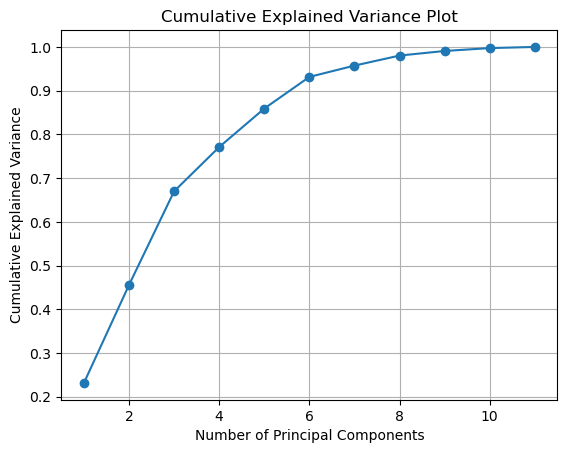

In [310]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import scipy.stats as stats
df_raw = df.drop(['loan_status_numeric'], axis=1)

# Perform PCA
from sklearn.decomposition import PCA
import numpy as np

# Assuming X is your feature matrix
pca = PCA()
raw_pca = pca.fit_transform(df_raw)

# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Print or use the explained variance ratio
print("Explained Variance Ratio for each component:")
print(explained_variance_ratio)

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

In [311]:
# Assuming you want to retain 95% of the total variance
desired_variance = 0.95

# Find the number of components needed to achieve the desired variance
n_components_needed = np.argmax(cumulative_variance >= desired_variance) + 1
n_components_needed

print("Components needed" )
print(+ n_components_needed)
pca = PCA(n_components=n_components_needed)
raw_pca = pca.fit_transform(df_raw)

Components needed
7


In [312]:
raw_pca

array([[ 0.85722712, -0.53537583,  0.07429632, ...,  0.04696833,
         0.31298393,  0.57199936],
       [-0.43844043,  0.62525321, -0.0155844 , ..., -0.24520079,
        -0.31689183,  0.01565161],
       [ 0.91554406, -0.51710858,  0.06929617, ...,  0.51235689,
        -0.16156304, -0.00992024],
       ...,
       [ 0.25447773,  0.04790652,  0.7453364 , ...,  0.35754951,
        -0.2468401 ,  0.4205399 ],
       [-0.20197858, -0.05739404,  0.69349447, ..., -0.19079833,
         0.28816305, -0.18695615],
       [ 1.13982253, -0.47217419,  0.09528431, ..., -0.09741533,
         0.02299029, -0.00840614]])

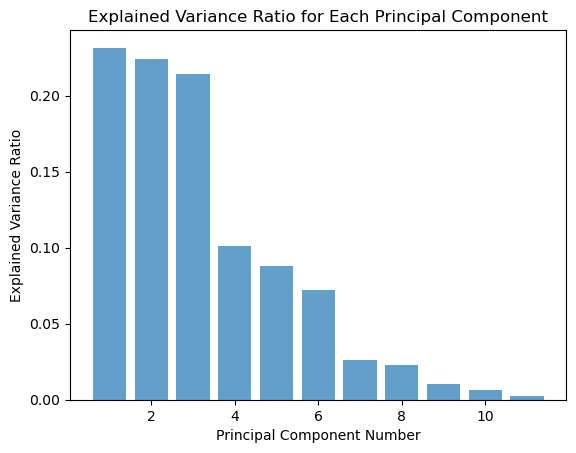

In [313]:
# Bar graph for explained variance ratio
component_numbers = range(1, len(explained_variance_ratio) + 1)
plt.bar(component_numbers, explained_variance_ratio, align='center', alpha=0.7)
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

In [314]:
raw_pca_pd =  pd.DataFrame(raw_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])


raw_pca_pd.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.857227,-0.535376,0.074296,-0.125412,0.046968,0.312984,0.571999
1,-0.438440,0.625253,-0.015584,-0.457591,-0.245201,-0.316892,0.015652
2,0.915544,-0.517109,0.069296,0.025357,0.512357,-0.161563,-0.009920
3,0.736636,-0.562692,0.046869,0.125553,-0.148705,-0.206805,-0.324940
4,0.469545,0.831614,0.075441,0.431293,0.547185,-0.358283,-0.001324


# Clustering

## K-Means:

### With Y

##### Elbow Method:-

In [315]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

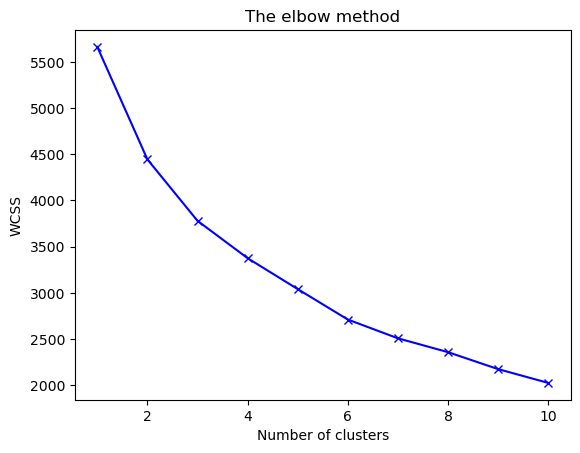

In [316]:
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares

##### Silhoutte Analysis:-

In [317]:
from sklearn.metrics import silhouette_score
avg_silhouette = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X_pca)
    cluster_labels = kmeans.labels_
    avg_silhouette.append(silhouette_score(X_pca, cluster_labels))

Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

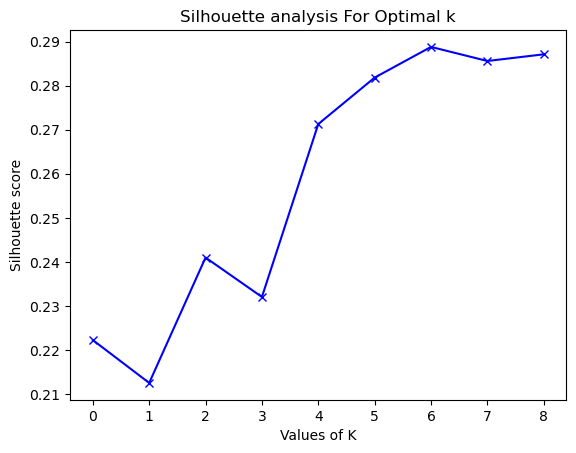

In [318]:
plt.plot(avg_silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')

##### DBI Score:-

/Users/ingo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ingo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ingo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ingo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

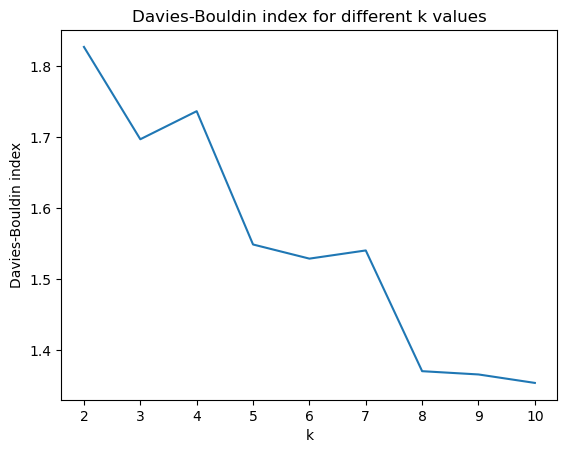

In [319]:
from sklearn.metrics import davies_bouldin_score
# prompt: draw a plot graph between k values and db_index

k_values = range(2, 11)
db_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    db_values.append(davies_bouldin_score(X_pca, kmeans.labels_))

plt.plot(k_values, db_values)
plt.xlabel('k')
plt.ylabel('Davies-Bouldin index')
plt.title('Davies-Bouldin index for different k values')
plt.show()

##### PCA 2:-

In [320]:
# Perform Clustering on PCA Components
n_clusters = 2  # Two clusters for 'approved' and 'declined'
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)
centroids = kmeans.cluster_centers_
# Visualize the Results with labeled clusters

/Users/ingo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [321]:
# Perform PCA
n_components_needed = 2
pca = PCA(n_components=n_components_needed)
X_pca2 = pca.fit_transform(X)

In [322]:
clusters

array([1, 0, 0, ..., 0, 1, 1], dtype=int32)

In [323]:
X_pca2

array([[-0.40619459,  0.91295045],
       [ 0.64691993, -0.51754047],
       [ 0.73005901,  0.85190257],
       ...,
       [ 0.71777526,  0.17863217],
       [-0.49638276, -0.15060253],
       [-0.25411257,  1.17864002]])

In [324]:
df_pca2 = pd.DataFrame(X_pca2, columns=['PC0', 'PC1'])
df_pca2["Cluster"] = clusters
df_pca2

,PC0,PC1,Cluster
0,-0.406195,0.912950,1
1,0.646920,-0.517540,0
2,0.730059,0.851903,0
3,0.688293,0.677468,0
4,0.839949,0.370549,0
...,...,...,...
4264,0.697934,-0.703499,0
4265,-0.293076,-0.459261,1
4266,0.717775,0.178632,0
4267,-0.496383,-0.150603,1


##### Visualization:-

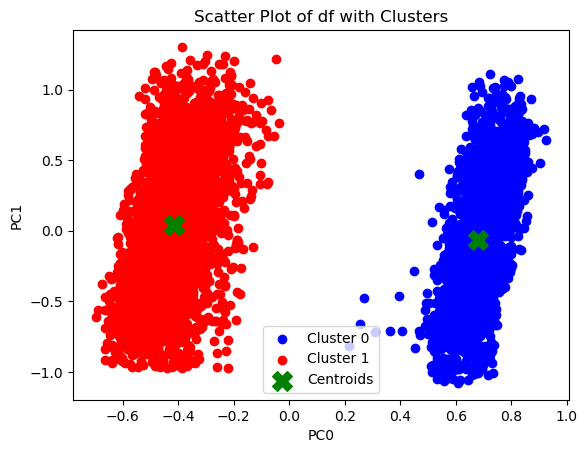

In [325]:
# Separate data based on clusters
cluster_0 = df_pca2[df_pca2['Cluster'] == 0]
cluster_1 = df_pca2[df_pca2['Cluster'] == 1]
plt.figure()
# Plotting
plt.scatter(cluster_0['PC0'], cluster_0['PC1'], color='blue', label='Cluster 0')
plt.scatter(cluster_1['PC0'], cluster_1['PC1'], color='red', label='Cluster 1')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='green', label='Centroids')

# Adding labels and title
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('Scatter Plot of df with Clusters')

# Adding legend
plt.legend()

# Display the plot
plt.show()


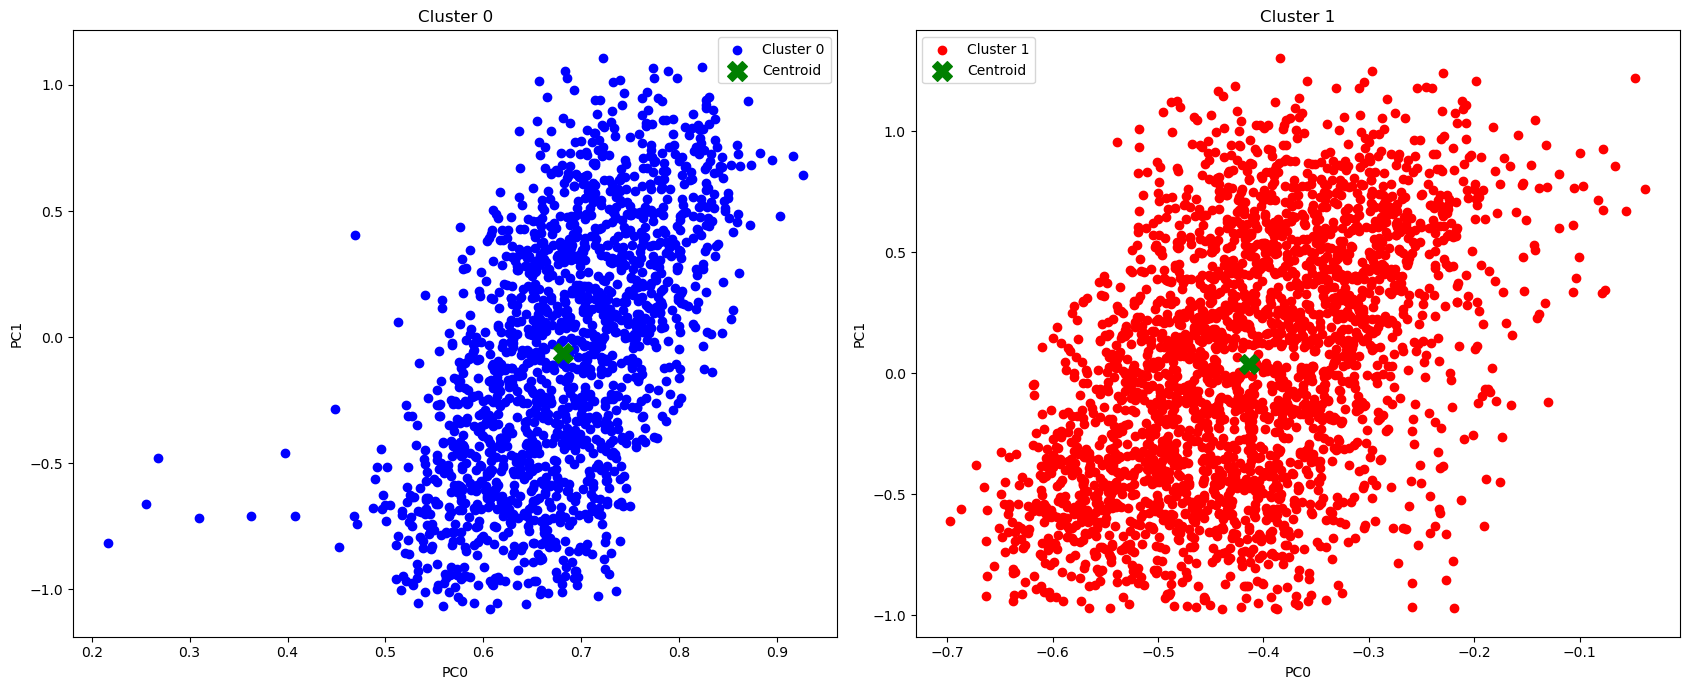

In [326]:
import matplotlib.pyplot as plt
import pandas as pd



# Separate data based on clusters
cluster_0 = df_pca2[df_pca2['Cluster'] == 0]
cluster_1 = df_pca2[df_pca2['Cluster'] == 1]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(17, 7))  # 1 row, 2 columns

# Plotting for Cluster 0
axs[0].scatter(cluster_0['PC0'], cluster_0['PC1'], color='blue', label='Cluster 0')
axs[0].scatter(centroids[0, 0], centroids[0, 1], marker='X', s=200, c='green', label='Centroid')
axs[0].set_xlabel('PC0')
axs[0].set_ylabel('PC1')
axs[0].set_title('Cluster 0')
axs[0].legend()

# Plotting for Cluster 1
axs[1].scatter(cluster_1['PC0'], cluster_1['PC1'], color='red', label='Cluster 1')
axs[1].scatter(centroids[1, 0], centroids[1, 1], marker='X', s=200, c='green', label='Centroid')
axs[1].set_xlabel('PC0')
axs[1].set_ylabel('PC1')
axs[1].set_title('Cluster 1')
axs[1].legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()


------------------------

## K-Means:

### Without Y

##### Elbow Method:-

In [327]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(raw_pca)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

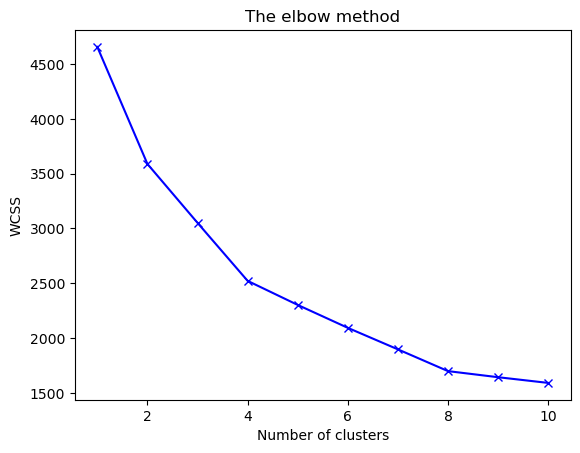

In [328]:
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares

##### Silhoutte Analysis:-

In [329]:
from sklearn.metrics import silhouette_score
avg_silhouette = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(raw_pca)
    cluster_labels = kmeans.labels_
    avg_silhouette.append(silhouette_score(raw_pca, cluster_labels))

Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

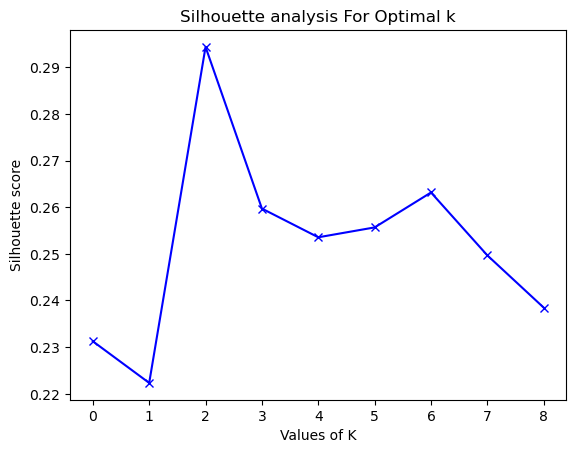

In [330]:
plt.plot(avg_silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')

##### DBI Score:-

/Users/ingo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ingo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ingo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ingo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

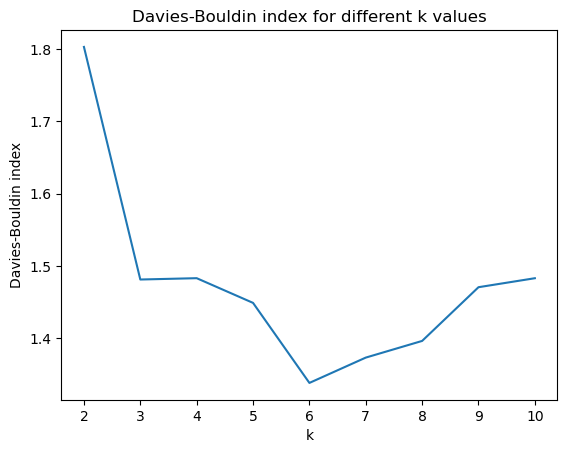

In [331]:
from sklearn.metrics import davies_bouldin_score
# prompt: draw a plot graph between k values and db_index

k_values = range(2, 11)
db_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(raw_pca)
    db_values.append(davies_bouldin_score(raw_pca, kmeans.labels_))

plt.plot(k_values, db_values)
plt.xlabel('k')
plt.ylabel('Davies-Bouldin index')
plt.title('Davies-Bouldin index for different k values')
plt.show()

##### PCA 2:-

In [332]:
# Perform Clustering on PCA Components
n_clusters = 2  # Two clusters for 'approved' and 'declined'
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(raw_pca)
centroids = kmeans.cluster_centers_
# Visualize the Results with labeled clusters

/Users/ingo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [333]:
# Perform PCA
n_components_needed = 2
pca = PCA(n_components=n_components_needed)
raw_pca2 = pca.fit_transform(X)

In [334]:
clusters

array([1, 0, 1, ..., 0, 0, 1], dtype=int32)

In [335]:
raw_pca2

array([[-0.40619459,  0.91295045],
       [ 0.64691993, -0.51754047],
       [ 0.73005901,  0.85190257],
       ...,
       [ 0.71777526,  0.17863217],
       [-0.49638276, -0.15060253],
       [-0.25411257,  1.17864002]])

In [336]:
dfraw_pca2 = pd.DataFrame(raw_pca2, columns=['PC0', 'PC1'])
dfraw_pca2["Cluster"] = clusters
dfraw_pca2

,PC0,PC1,Cluster
0,-0.406195,0.912950,1
1,0.646920,-0.517540,0
2,0.730059,0.851903,1
3,0.688293,0.677468,1
4,0.839949,0.370549,0
...,...,...,...
4264,0.697934,-0.703499,1
4265,-0.293076,-0.459261,0
4266,0.717775,0.178632,0
4267,-0.496383,-0.150603,0


##### Visualization:-

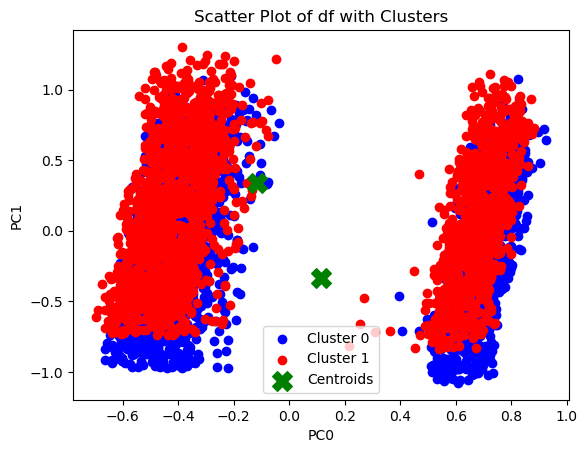

In [337]:
# Separate data based on clusters
cluster_0 = dfraw_pca2[dfraw_pca2['Cluster'] == 0]
cluster_1 = dfraw_pca2[dfraw_pca2['Cluster'] == 1]
plt.figure()
# Plotting
plt.scatter(cluster_0['PC0'], cluster_0['PC1'], color='blue', label='Cluster 0')
plt.scatter(cluster_1['PC0'], cluster_1['PC1'], color='red', label='Cluster 1')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='green', label='Centroids')

# Adding labels and title
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('Scatter Plot of df with Clusters')

# Adding legend
plt.legend()

# Display the plot
plt.show()


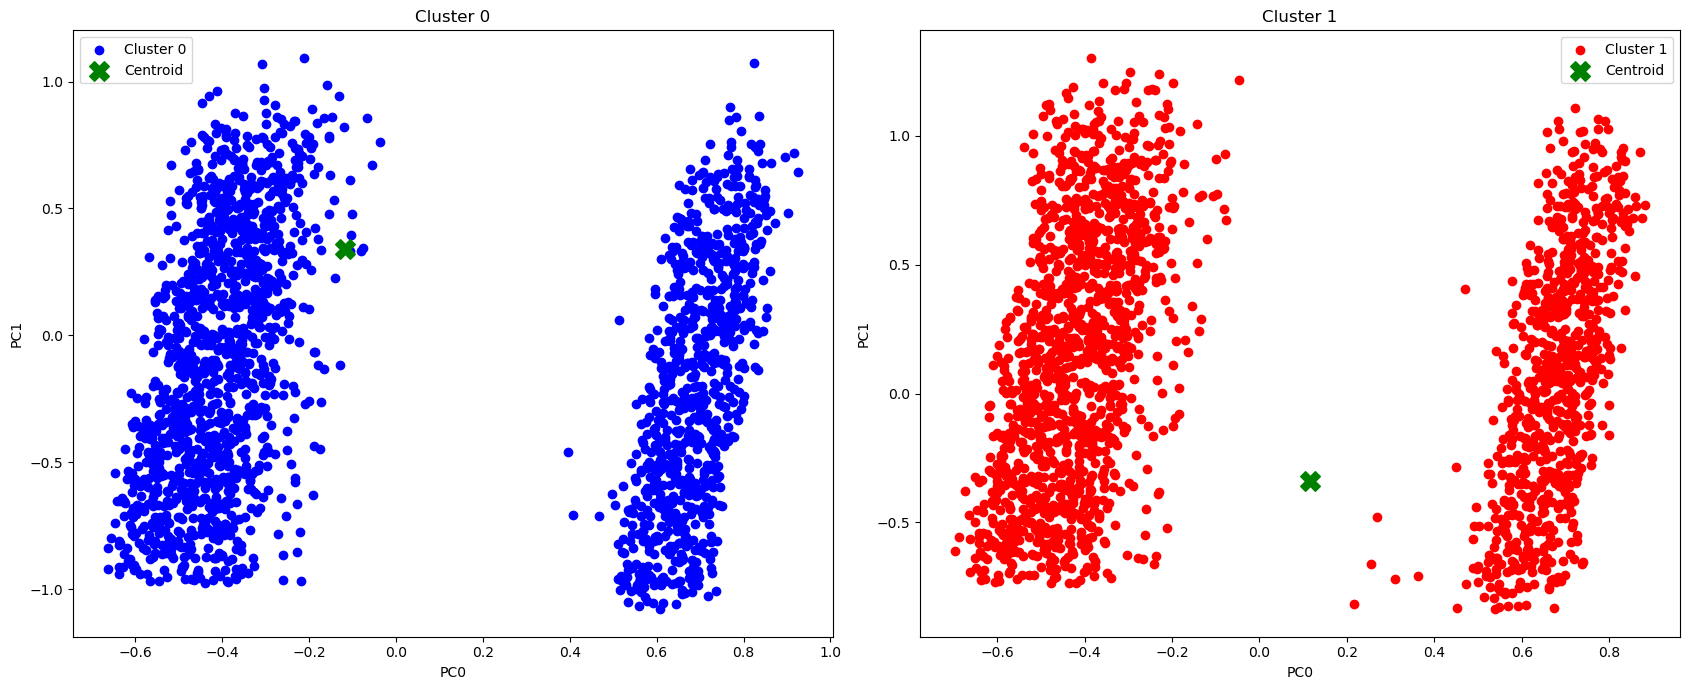

In [338]:
import matplotlib.pyplot as plt
import pandas as pd



# Separate data based on clusters
cluster_0 = dfraw_pca2[dfraw_pca2['Cluster'] == 0]
cluster_1 = dfraw_pca2[dfraw_pca2['Cluster'] == 1]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(17, 7))  # 1 row, 2 columns

# Plotting for Cluster 0
axs[0].scatter(cluster_0['PC0'], cluster_0['PC1'], color='blue', label='Cluster 0')
axs[0].scatter(centroids[0, 0], centroids[0, 1], marker='X', s=200, c='green', label='Centroid')
axs[0].set_xlabel('PC0')
axs[0].set_ylabel('PC1')
axs[0].set_title('Cluster 0')
axs[0].legend()

# Plotting for Cluster 1
axs[1].scatter(cluster_1['PC0'], cluster_1['PC1'], color='red', label='Cluster 1')
axs[1].scatter(centroids[1, 0], centroids[1, 1], marker='X', s=200, c='green', label='Centroid')
axs[1].set_xlabel('PC0')
axs[1].set_ylabel('PC1')
axs[1].set_title('Cluster 1')
axs[1].legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()


In [339]:
raw_pca

array([[ 0.85722712, -0.53537583,  0.07429632, ...,  0.04696833,
         0.31298393,  0.57199936],
       [-0.43844043,  0.62525321, -0.0155844 , ..., -0.24520079,
        -0.31689183,  0.01565161],
       [ 0.91554406, -0.51710858,  0.06929617, ...,  0.51235689,
        -0.16156304, -0.00992024],
       ...,
       [ 0.25447773,  0.04790652,  0.7453364 , ...,  0.35754951,
        -0.2468401 ,  0.4205399 ],
       [-0.20197858, -0.05739404,  0.69349447, ..., -0.19079833,
         0.28816305, -0.18695615],
       [ 1.13982253, -0.47217419,  0.09528431, ..., -0.09741533,
         0.02299029, -0.00840614]])

## K-mediods with Y

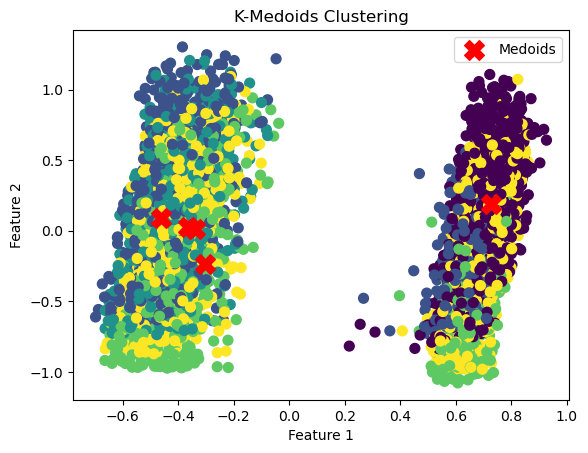

In [340]:
X= X_pca

# Perform K-Medoids clustering
k = 5  # Specify the number of clusters
kmedoids = KMedoids(n_clusters=k, random_state=0)
kmedoids.fit(X)

# Get cluster labels and medoid indices
cluster_labels = kmedoids.labels_
medoid_indices = kmedoids.medoid_indices_

# Visualize the clustered data with different colors for each cluster
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(X[medoid_indices, 0], X[medoid_indices, 1], c='red', s=200, marker='X', label='Medoids')
plt.title('K-Medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## K-mediods without Y

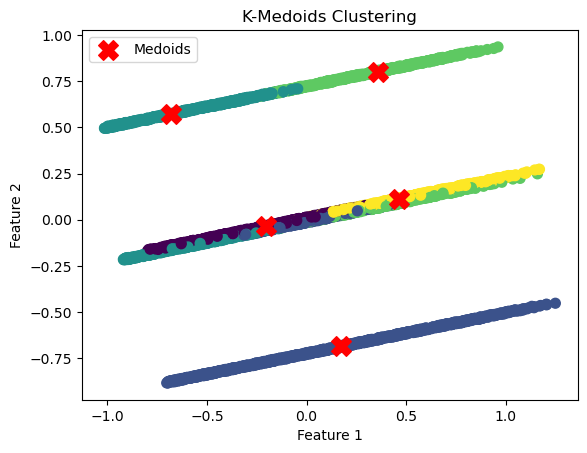

In [343]:
X= raw_pca

# Perform K-Medoids clustering
k = 5  # Specify the number of clusters
kmedoids = KMedoids(n_clusters=k, random_state=0)
kmedoids.fit(X)

# Get cluster labels and medoid indices
cluster_labels = kmedoids.labels_
medoid_indices = kmedoids.medoid_indices_

# Visualize the clustered data with different colors for each cluster
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.scatter(X[medoid_indices, 0], X[medoid_indices, 1], c='red', s=200, marker='X', label='Medoids')
plt.title('K-Medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### hierarchical : aglomorative


In [ ]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean')
model.fit(X_pca)

n_components_needed = 2
pca = PCA(n_components=n_components_needed)
X_pca2 = pca.fit_transform(X)


dfA = pd.DataFrame(X_pca2, columns=['PC0', 'PC1'])
dfA['Cluster']=model.labels_
dfA

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,PC0,PC1,Cluster
0,-0.406195,0.912950,0
1,0.646920,-0.517540,1
2,0.730059,0.851903,1
3,0.688293,0.677468,1
4,0.839949,0.370549,1
...,...,...,...
4264,0.697934,-0.703499,1
4265,-0.293076,-0.459261,0
4266,0.717775,0.178632,1
4267,-0.496383,-0.150603,0


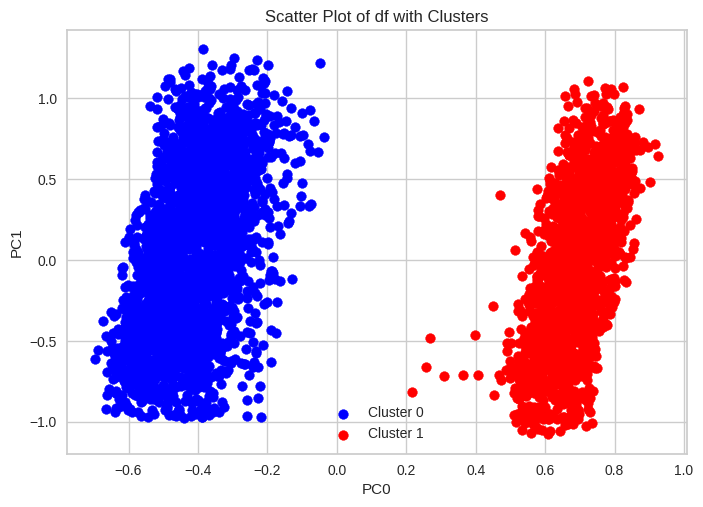

In [ ]:
# Separate data based on clustersf
cluster_0 = dfA[dfA['Cluster'] == 0]
cluster_1 = dfA[dfA['Cluster'] == 1]
plt.figure()
# Plotting
plt.scatter(cluster_0['PC0'], cluster_0['PC1'], color='blue', label='Cluster 0')
plt.scatter(cluster_1['PC0'], cluster_1['PC1'], color='red', label='Cluster 1')
#plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='green', label='Centroids')

# Adding labels and title
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('Scatter Plot of df with Clusters')

# Adding legend
plt.legend()

# Display the plot
plt.show()

### hierarchical : aglomorative without



In [348]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean')
model.fit(raw_pca)

n_components_needed = 2
pca = PCA(n_components=n_components_needed)
X_pca2 = pca.fit_transform(X)


dfA = pd.DataFrame(X_pca2, columns=['PC0', 'PC1'])
dfA['Cluster']=model.labels_
dfA

/Users/ingo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,PC0,PC1,Cluster
0,0.857227,-0.535376,1
1,-0.438440,0.625253,0
2,0.915544,-0.517109,1
3,0.736636,-0.562692,1
4,0.469545,0.831614,0
...,...,...,...
4264,-0.629157,-0.130160,0
4265,-0.476232,0.623034,0
4266,0.254478,0.047907,1
4267,-0.201979,-0.057394,1


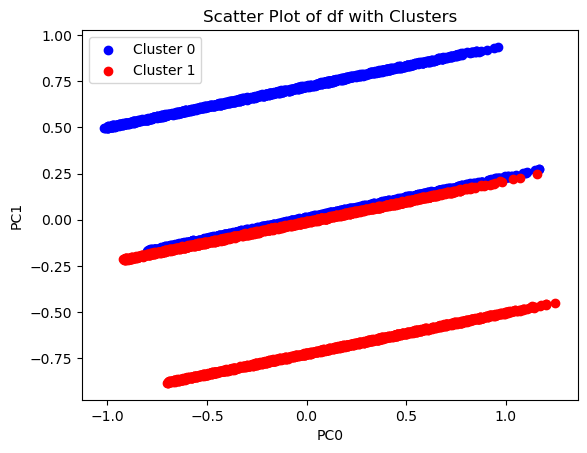

In [349]:
# Separate data based on clustersf
cluster_0 = dfA[dfA['Cluster'] == 0]
cluster_1 = dfA[dfA['Cluster'] == 1]
plt.figure()
# Plotting
plt.scatter(cluster_0['PC0'], cluster_0['PC1'], color='blue', label='Cluster 0')
plt.scatter(cluster_1['PC0'], cluster_1['PC1'], color='red', label='Cluster 1')
#plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='green', label='Centroids')

# Adding labels and title
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('Scatter Plot of df with Clusters')

# Adding legend
plt.legend()

# Display the plot
plt.show()

#### DBSCAN with target


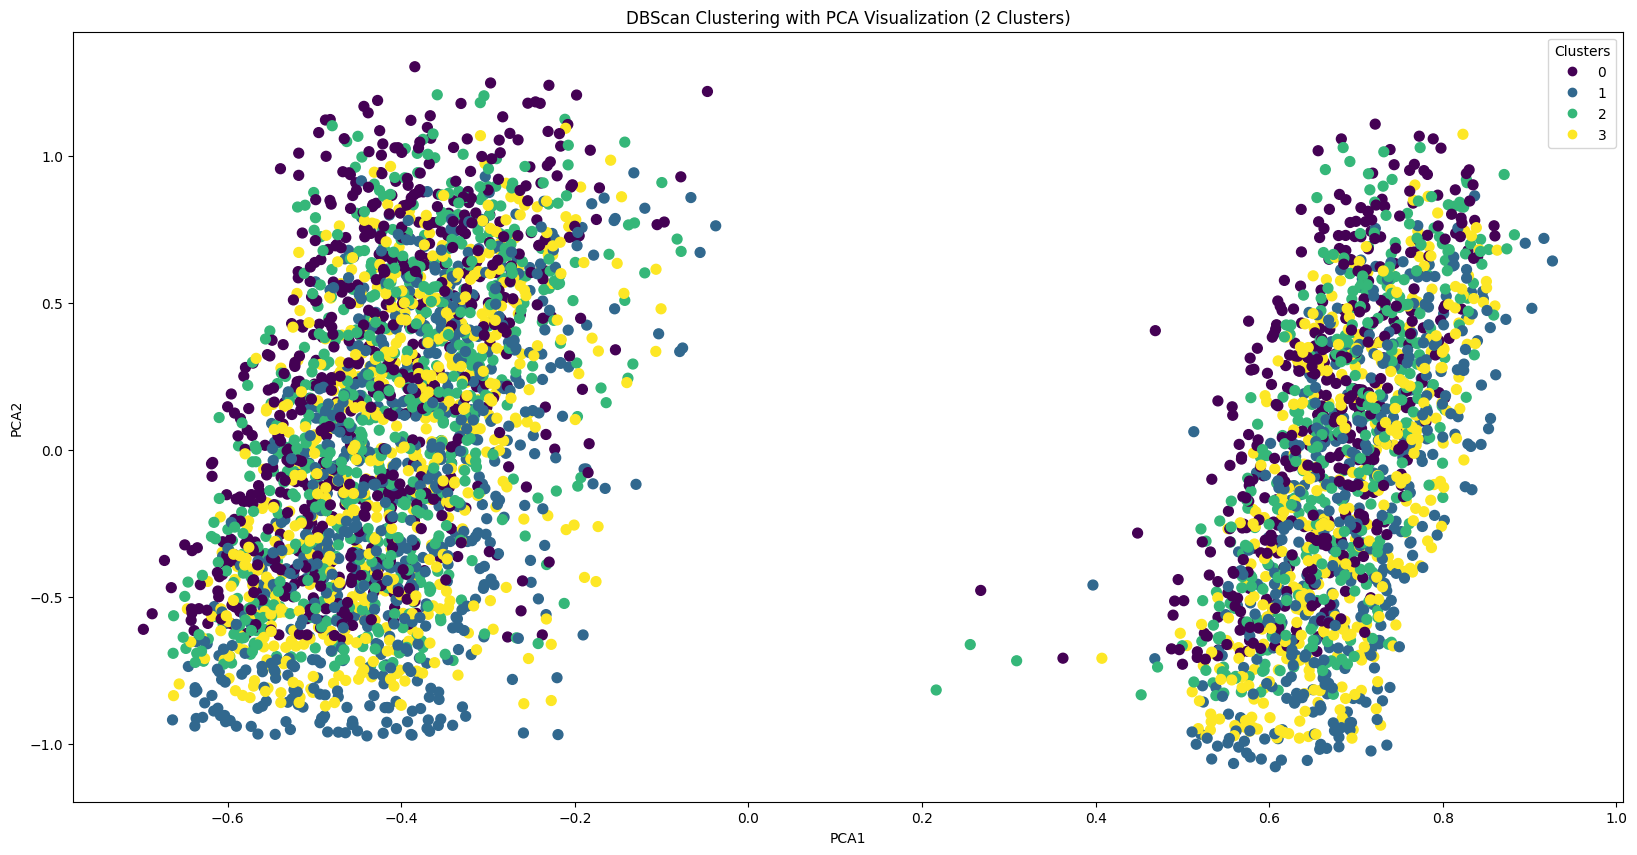

In [ ]:
# Apply DBScan with n_clusters=2
dbscan = DBSCAN(eps=1)
clusters = dbscan.fit_predict(X_pca)

# Apply PCA for dimensionality reduction
#pca = PCA(n_components=2)
#X_pca = pca.fit_transform(df)


# Perform PCA
n_components_needed = 2
pca = PCA(n_components=n_components_needed)
X_pca2 = pca.fit_transform(X)


df = pd.DataFrame(X_pca2, columns=['PC0', 'PC1'])


# Create a new dataframe with the cluster labels and principal components
#cluster_df = pd.DataFrame({'Cluster': clusters, 'PCA1': X_pca[:, 0], 'PCA2': X_pca[:, 1]})

# Concatenate the cluster_df with the original dataframe
result_df = pd.concat([data, df], axis=1)

# Visualize clusters using a scatter plot
plt.figure(figsize=(20, 10))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('DBScan Clustering with PCA Visualization (2 Clusters)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

#### kmodes with without

In [ ]:
!pip install kmodes
from kmodes.kmodes import KModes
cost = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(X_pca)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 34144.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 34144.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 34144.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 34144.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 34144.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 34136.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 34136.0
Init: initializing centroids
Init: initializing clusters
Starting iteration

Text(0.5, 1.0, 'Elbow Method For Optimal k')

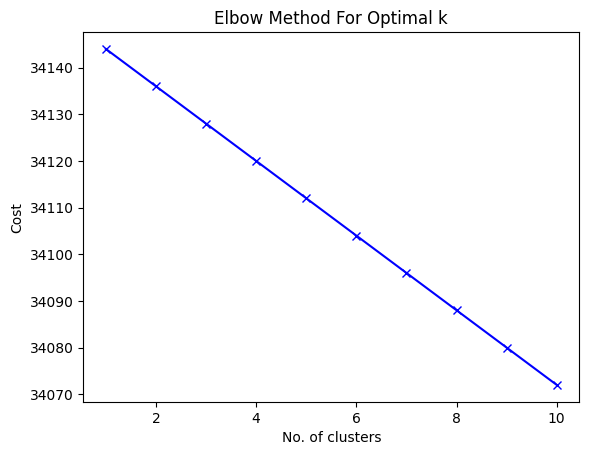

In [ ]:
plt.plot(range(1,11), cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')

In [ ]:
from sklearn.metrics import silhouette_score
avg_silhouette = []

for i in range(2, 11):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1,random_state=42)
    kmode.fit(X_pca)
    cluster_labels = kmode.labels_
    avg_silhouette.append(silhouette_score(X_pca, cluster_labels))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 34072.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 34072.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 34072.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 34072.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 34072.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 34072.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 34072.0
Init: initializing centroids
Init: initializing clusters
Starting iteration

Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

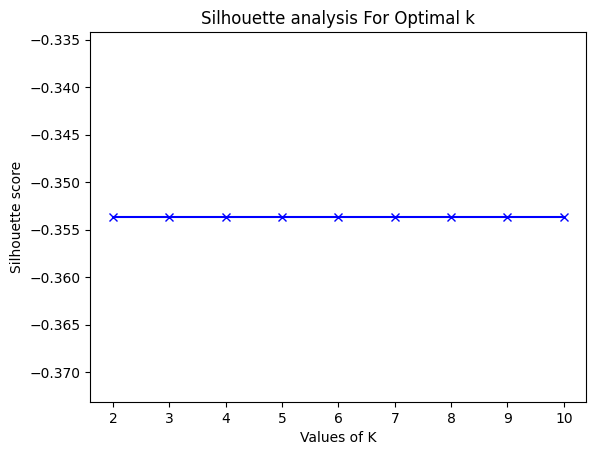

In [ ]:
plt.plot(range(2, 11),avg_silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')

In [ ]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X_pca)
clusters
#centroids = kModes.cluster_centers_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 34136.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 34136.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 34136.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 34136.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 34136.0
Best run was number 1


array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [ ]:
n_components_needed = 2
pca = PCA(n_components=n_components_needed)
X_pca2 = pca.fit_transform(X)

In [ ]:
df = pd.DataFrame(X_pca2, columns=['PC0', 'PC1'])

In [ ]:
df["Cluster"] = clusters
df

,PC0,PC1,Cluster
0,-0.406195,0.912950,0
1,0.646920,-0.517540,0
2,0.730059,0.851903,0
3,0.688293,0.677468,0
4,0.839949,0.370549,0
...,...,...,...
4264,0.697934,-0.703499,0
4265,-0.293076,-0.459261,0
4266,0.717775,0.178632,0
4267,-0.496383,-0.150603,0


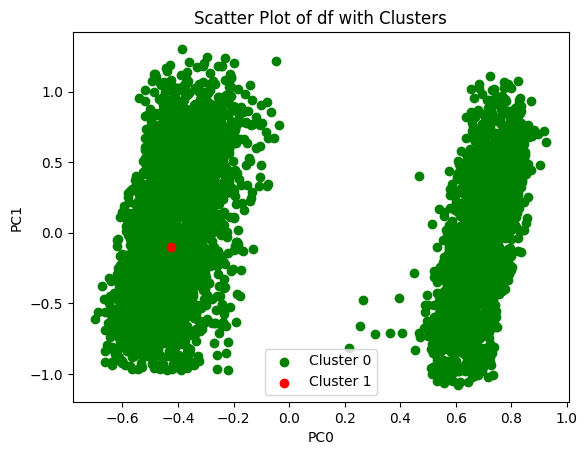

In [ ]:
# Separate data based on clustersf
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
plt.figure()
# Plotting
plt.scatter(cluster_0['PC0'], cluster_0['PC1'], color='green', label='Cluster 0')
plt.scatter(cluster_1['PC0'], cluster_1['PC1'], color='red', label='Cluster 1')
#plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='green', label='Centroids')

# Adding labels and title
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('Scatter Plot of df with Clusters')

# Adding legend
plt.legend()

# Display the plot
plt.show()


# Classification

## Splitting normalized dataset

In [ ]:
df

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status_numeric,education_numeric,self_employed_numeric
0,0.4,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,1.0,1.0,0.0
1,0.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,0.0,0.0,1.0
2,0.6,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,0.0,1.0,0.0
3,0.6,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,0.0,1.0,0.0
4,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1.0,0.082474,0.051020,0.555556,0.028333,0.099315,0.025773,0.077121,0.054422,0.0,1.0,1.0
4265,0.0,0.319588,0.280612,1.000000,0.431667,0.147260,0.149485,0.275064,0.129252,1.0,0.0,1.0
4266,0.4,0.649485,0.602041,0.888889,0.261667,0.044521,0.639175,0.457584,0.496599,0.0,0.0,0.0
4267,0.2,0.402062,0.318878,0.333333,0.800000,0.284247,0.036082,0.354756,0.394558,1.0,0.0,0.0


In [ ]:
df_class = df.copy()

In [ ]:
df_class

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status_numeric,education_numeric,self_employed_numeric
0,0.4,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,1.0,1.0,0.0
1,0.0,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,0.0,0.0,1.0
2,0.6,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,0.0,1.0,0.0
3,0.6,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,0.0,1.0,0.0
4,1.0,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1.0,0.082474,0.051020,0.555556,0.028333,0.099315,0.025773,0.077121,0.054422,0.0,1.0,1.0
4265,0.0,0.319588,0.280612,1.000000,0.431667,0.147260,0.149485,0.275064,0.129252,1.0,0.0,1.0
4266,0.4,0.649485,0.602041,0.888889,0.261667,0.044521,0.639175,0.457584,0.496599,0.0,0.0,0.0
4267,0.2,0.402062,0.318878,0.333333,0.800000,0.284247,0.036082,0.354756,0.394558,1.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the loan dataset
def split_data(dff):
    raw = dff

    # Separate the target from the features
    target = raw['loan_status_numeric']
    data = raw.drop(['loan_status_numeric'], axis=1)

    return train_test_split(data, target, test_size=0.3, random_state=42)

In [ ]:
df_class.columns

Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', 'loan_status_numeric',
       'education_numeric', 'self_employed_numeric'],
      dtype='object')

In [ ]:
# load the data
X_train, X_test, y_train, y_test = split_data(df_class)

# Show the first 5 rows of the dataframe
X_train.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_numeric,self_employed_numeric
3404,0.8,0.268041,0.204082,0.666667,0.135000,0.113014,0.056701,0.226221,0.102041,0.0,0.0
781,0.6,1.000000,0.512755,0.111111,0.941667,0.904110,0.185567,0.930591,0.870748,0.0,1.0
3002,0.8,0.340206,0.265306,0.333333,0.971667,0.010274,0.118557,0.208226,0.136054,1.0,1.0
4047,0.6,0.639175,0.579082,0.333333,0.366667,0.417808,0.587629,0.403599,0.258503,0.0,0.0
3391,0.4,0.319588,0.163265,0.333333,0.908333,0.047945,0.237113,0.308483,0.217687,1.0,1.0


In [ ]:
X_train.corr()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_numeric,self_employed_numeric
no_of_dependents,1.000000,0.000256,-0.007731,-0.012531,-0.008442,-0.006673,-0.004101,-0.006367,0.005316,-0.010196,0.007422
income_annum,0.000256,1.000000,0.928383,0.017354,-0.036682,0.634352,0.633718,0.928056,0.849639,0.013002,0.002045
loan_amount,-0.007731,0.928383,1.000000,0.018343,-0.026847,0.588828,0.590508,0.858396,0.782245,0.011665,-0.000249
loan_term,-0.012531,0.017354,0.018343,1.000000,0.008453,0.009412,0.000632,0.017262,0.020203,-0.008671,-0.003858
cibil_score,-0.008442,-0.036682,-0.026847,0.008453,1.000000,-0.043259,-0.006271,-0.037326,-0.018143,-0.003754,-0.004163
residential_assets_value,-0.006673,0.634352,0.588828,0.009412,-0.043259,1.000000,0.402003,0.580027,0.533244,0.015495,0.006839
commercial_assets_value,-0.004101,0.633718,0.590508,0.000632,-0.006271,0.402003,1.000000,0.577120,0.550251,0.005898,-0.015673
luxury_assets_value,-0.006367,0.928056,0.858396,0.017262,-0.037326,0.580027,0.577120,1.000000,0.788922,0.015413,0.002447
bank_asset_value,0.005316,0.849639,0.782245,0.020203,-0.018143,0.533244,0.550251,0.788922,1.000000,0.010710,-0.005404
education_numeric,-0.010196,0.013002,0.011665,-0.008671,-0.003754,0.015495,0.005898,0.015413,0.010710,1.000000,-0.015505


In [ ]:
y_train

3404    0.0
781     1.0
3002    1.0
4047    0.0
3391    1.0
       ... 
3444    0.0
466     0.0
3092    0.0
3772    0.0
860     1.0
Name: loan_status_numeric, Length: 2988, dtype: float64

In [ ]:
X_train


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_numeric,self_employed_numeric
3404,0.8,0.268041,0.204082,0.666667,0.135000,0.113014,0.056701,0.226221,0.102041,0.0,0.0
781,0.6,1.000000,0.512755,0.111111,0.941667,0.904110,0.185567,0.930591,0.870748,0.0,1.0
3002,0.8,0.340206,0.265306,0.333333,0.971667,0.010274,0.118557,0.208226,0.136054,1.0,1.0
4047,0.6,0.639175,0.579082,0.333333,0.366667,0.417808,0.587629,0.403599,0.258503,0.0,0.0
3391,0.4,0.319588,0.163265,0.333333,0.908333,0.047945,0.237113,0.308483,0.217687,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3444,0.0,0.113402,0.112245,0.777778,0.383333,0.113014,0.051546,0.089974,0.054422,1.0,1.0
466,1.0,0.030928,0.038265,0.888889,0.185000,0.037671,0.025773,0.025707,0.013605,0.0,1.0
3092,0.8,0.865979,0.517857,0.777778,0.248333,0.373288,0.546392,0.730077,0.367347,0.0,1.0
3772,0.4,0.701031,0.538265,0.555556,0.401667,0.130137,0.067010,0.501285,0.653061,0.0,1.0


## Logistic Regression

In [ ]:
# Do logistic regression on the dataset
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
log_model_norm = LogisticRegression()

# Train the model
log_model_norm.fit(X_train, y_train)

# Make predictions on the test data
predictions_lr = log_model_norm.predict(X_test)

predictions_lr

array([0., 1., 0., ..., 1., 0., 1.])

In [ ]:
from sklearn.metrics import classification_report

lg_report = classification_report(y_test,predictions_lr)

print(lg_report)

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       471
         1.0       0.93      0.93      0.93       810

    accuracy                           0.91      1281
   macro avg       0.90      0.90      0.90      1281
weighted avg       0.91      0.91      0.91      1281



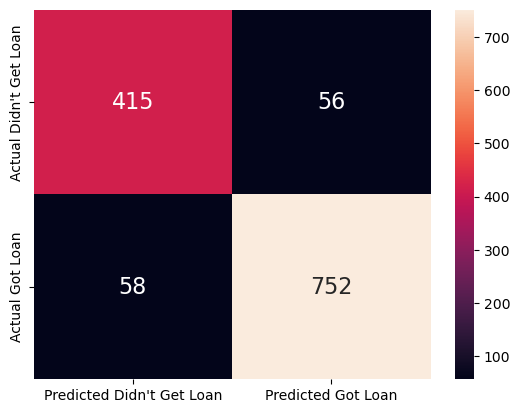

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# calculate the confusion matrix
conf_mat = confusion_matrix(y_test, predictions_lr)

conf_frame = pd.DataFrame(conf_mat,
                        columns=['Predicted Didn\'t Get Loan', 'Predicted Got Loan'],
                        index=['Actual Didn\'t Get Loan', 'Actual Got Loan'])

sns.heatmap(conf_frame, annot=True, fmt='d', annot_kws={"size": 16})
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
lr_accuracy = accuracy_score(y_test, predictions_lr)

print('Accuracy:', lr_accuracy*100, '%')

Accuracy: 91.10070257611241 %


In [ ]:
from sklearn.metrics import precision_score

# Calculate the percision
lr_precision = precision_score(y_test, predictions_lr, average='weighted')

print('Precision:', lr_precision*100, '%')

Precision: 91.10902648458845 %


In [ ]:
from sklearn.metrics import recall_score

# Calculate the recall
lr_recall = recall_score(y_test, predictions_lr, average='weighted')

print('Recall:', lr_recall*100, '%')

Recall: 91.10070257611241 %


In [ ]:
from sklearn.metrics import f1_score

# Calculate the F1 score
lr_f1 = f1_score(y_test, predictions_lr, average='weighted')

print('F1 score:', lr_f1*100, '%')

F1 score: 91.10462961413783 %


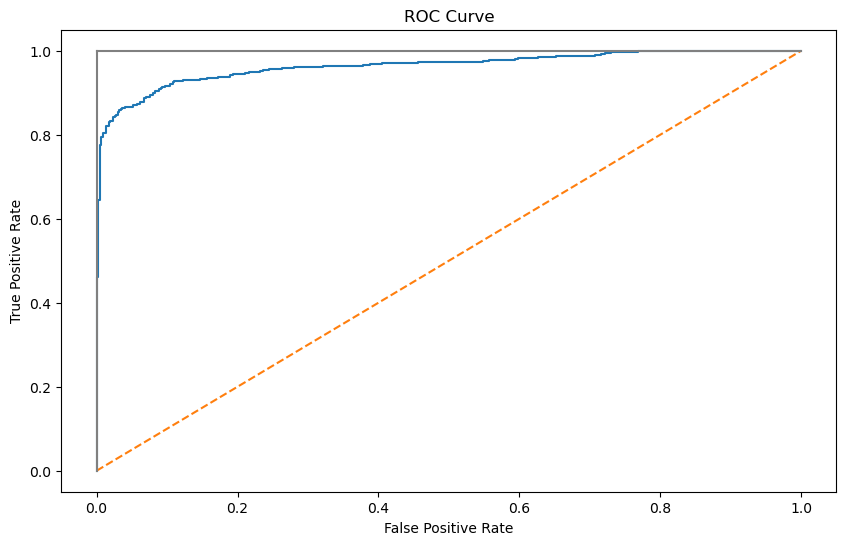

ROC AUC: 0.9633456528007129


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get the predicted probabilities
y_pred_prob = log_model_norm.predict_proba(X_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0], c='.5')
plt.plot([1,1], c='.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ROC AUC score
print('ROC AUC:', roc_auc)


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a random forest classifier

nb_model_norm = GaussianNB()

# Train the model

nb_model_norm.fit(X_train, y_train)

# Make predictions on the test data

predictions_nb = nb_model_norm.predict(X_test)

predictions_nb

array([0., 1., 0., ..., 1., 0., 1.])

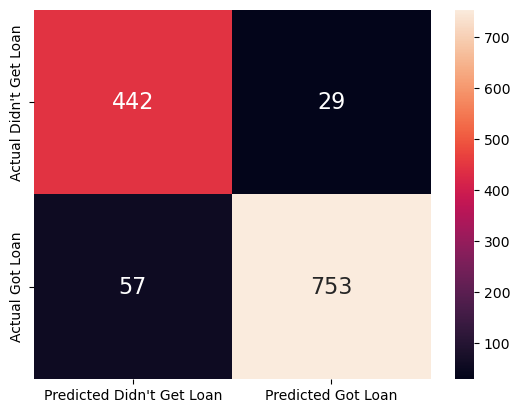

In [ ]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
conf_mat = confusion_matrix(y_test, predictions_nb)

conf_frame = pd.DataFrame(conf_mat,
                        columns=['Predicted Didn\'t Get Loan', 'Predicted Got Loan'],
                        index=['Actual Didn\'t Get Loan', 'Actual Got Loan'])

sns.heatmap(conf_frame, annot=True, fmt='d', annot_kws={"size": 16})
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
nb_accuracy = accuracy_score(y_test, predictions_nb)

print('Accuracy:', nb_accuracy*100, '%')

Accuracy: 93.2864949258392 %


In [ ]:
from sklearn.metrics import precision_score

# Calculate the percision
nb_precision = precision_score(y_test, predictions_nb, average='weighted')

print('Precision:', nb_precision*100, '%')

Precision: 93.45511581750442 %


In [ ]:
from sklearn.metrics import recall_score

# Calculate the recall
nb_recall = recall_score(y_test, predictions_nb, average='weighted')

print('Recall:', nb_recall*100, '%')

Recall: 93.2864949258392 %


In [ ]:
from sklearn.metrics import f1_score

# Calculate the F1 score
nb_f1 = f1_score(y_test, predictions_nb, average='weighted')

print('F1 score:', nb_f1*100, '%')

F1 score: 93.32435251415822 %


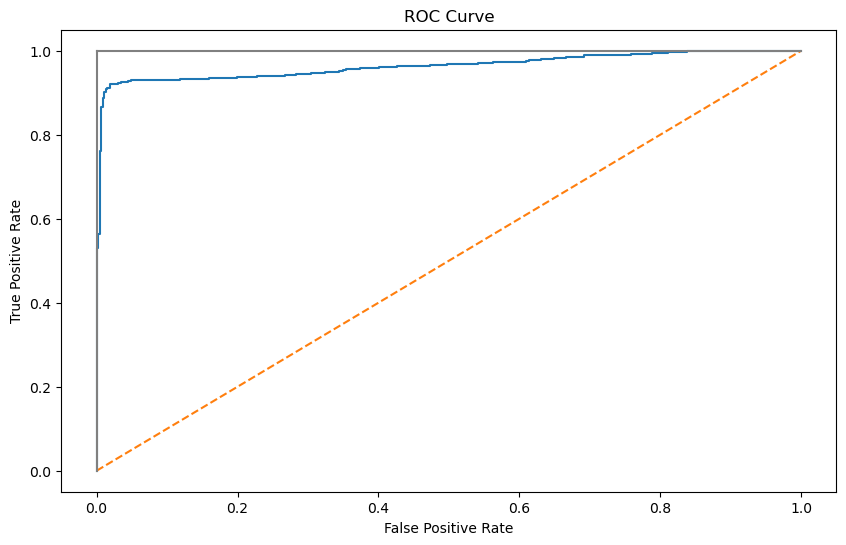

ROC AUC: 96.35396188828604 %


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get the predicted probabilities
y_pred_prob = nb_model_norm.predict_proba(X_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0], c='.5')
plt.plot([1,1], c='.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#ROC AUC score
print('ROC AUC:', roc_auc*100, '%')


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier

rf_model_norm = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)

# Train the model

rf_model_norm.fit(X_train, y_train)

# Make predictions on the test data

predictions_rf = rf_model_norm.predict(X_test)

predictions_rf

array([0., 1., 0., ..., 1., 0., 1.])

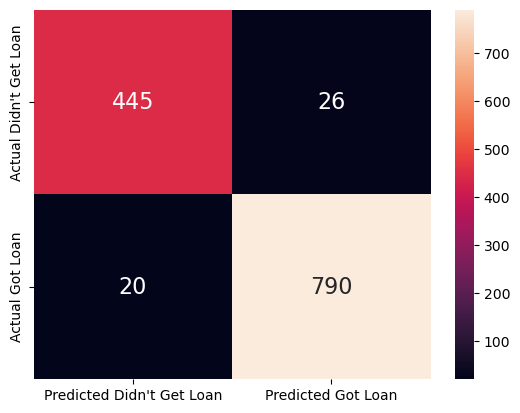

In [ ]:
# calculate the confusion matrix
conf_mat = confusion_matrix(y_test, predictions_rf)

conf_frame = pd.DataFrame(conf_mat,
                        columns=['Predicted Didn\'t Get Loan', 'Predicted Got Loan'],
                        index=['Actual Didn\'t Get Loan', 'Actual Got Loan'])

sns.heatmap(conf_frame, annot=True, fmt='d', annot_kws={"size": 16})
plt.show()

In [ ]:
# Calculate the accuracy
rf_accuracy = accuracy_score(y_test, predictions_rf)

print('Accuracy:', rf_accuracy*100, '%')

Accuracy: 96.40905542544887 %


In [ ]:
# Calculate the percision
rf_precision = precision_score(y_test, predictions_rf, average='weighted')

print('Precision:', rf_precision*100, '%')

Precision: 96.40383387622633 %


In [ ]:
# Calculate the recall
rf_recall = recall_score(y_test, predictions_rf, average='weighted')

print('Recall:', rf_recall*100, '%')

Recall: 96.40905542544887 %


In [ ]:
# Calculate the F1 score
rf_f1 = f1_score(y_test, predictions_rf, average='weighted')

print('F1 score:', rf_f1*100, '%')

F1 score: 96.40417134670358 %


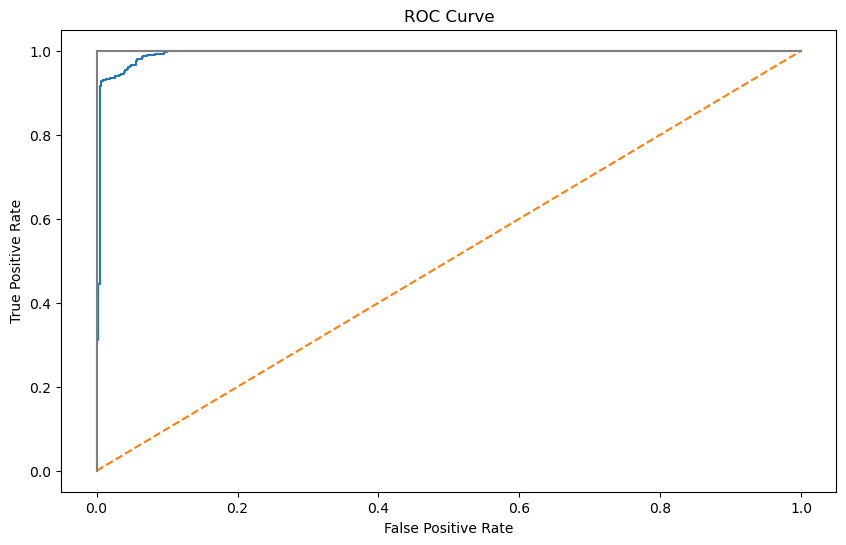

ROC AUC: 99.39634609839847 %


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get the predicted probabilities
y_pred_prob = rf_model_norm.predict_proba(X_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_prob)

roc_auc = auc(false_positive_rate, true_positive_rate)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0], c='.5')
plt.plot([1,1], c='.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('ROC AUC:', roc_auc*100, '%')

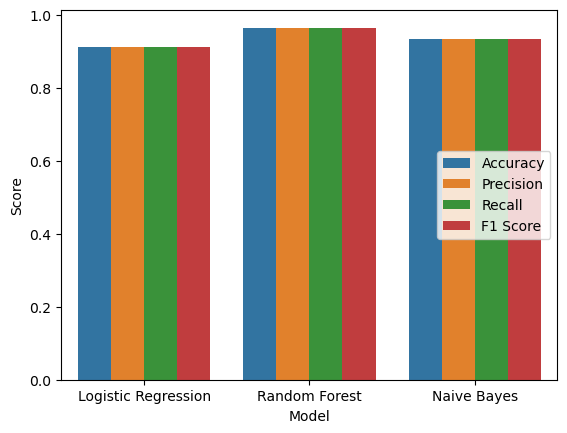

In [ ]:

metrics_df = pd.DataFrame({ 'Model' : ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Naive Bayes'],
                            'Metric' : ['Accuracy', 'Accuracy', 'Accuracy', 'Precision', 'Precision', 'Precision', 'Recall', 'Recall', 'Recall', 'F1 Score', 'F1 Score', 'F1 Score'],
                            'Score' : [lr_accuracy, rf_accuracy, nb_accuracy, lr_precision, rf_precision, nb_precision, lr_recall, rf_recall, nb_recall, lr_f1, rf_f1, nb_f1]})

sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_df)
plt.legend(loc='center right')
plt.show()

### SVM

In [ ]:
from sklearn.svm import SVC

svc_model = SVC(probability=True)

svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

y_pred

array([0., 1., 0., ..., 1., 0., 1.])

In [ ]:

from sklearn.metrics import classification_report

svm_report = classification_report(y_test,y_pred)

print(svm_report)

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.90       471
         1.0       0.95      0.93      0.94       810

    accuracy                           0.92      1281
   macro avg       0.92      0.92      0.92      1281
weighted avg       0.93      0.92      0.92      1281



# Classification -> PCA dataset

## Splitting data for PCA


In [ ]:
y_train

3404    0.0
781     1.0
3002    1.0
4047    0.0
3391    1.0
       ... 
3444    0.0
466     0.0
3092    0.0
3772    0.0
860     1.0
Name: loan_status_numeric, Length: 2988, dtype: float64

In [ ]:
raw_pca_class = raw_pca.copy()

In [ ]:
raw_pca_class

array([[ 0.85722712, -0.53537583,  0.07429632, ...,  0.04696833,
         0.31298393,  0.57199936],
       [-0.43844043,  0.62525321, -0.0155844 , ..., -0.24520079,
        -0.31689183,  0.01565161],
       [ 0.91554406, -0.51710858,  0.06929617, ...,  0.51235689,
        -0.16156304, -0.00992024],
       ...,
       [ 0.25447773,  0.04790652,  0.7453364 , ...,  0.35754951,
        -0.2468401 ,  0.4205399 ],
       [-0.20197858, -0.05739404,  0.69349447, ..., -0.19079833,
         0.28816305, -0.18695615],
       [ 1.13982253, -0.47217419,  0.09528431, ..., -0.09741533,
         0.02299029, -0.00840614]])

In [ ]:
data_pca=pd.DataFrame(raw_pca_class, columns=['PC1', 'PC2', 'PC3', 'PC4',' PC5', 'PC6', 'PC7'])
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,0.857227,-0.535376,0.074296,-0.125412,0.046968,0.312984,0.571999
1,-0.438440,0.625253,-0.015584,-0.457591,-0.245201,-0.316892,0.015652
2,0.915544,-0.517109,0.069296,0.025357,0.512357,-0.161563,-0.009920
3,0.736636,-0.562692,0.046869,0.125553,-0.148705,-0.206805,-0.324940
4,0.469545,0.831614,0.075441,0.431293,0.547185,-0.358283,-0.001324
...,...,...,...,...,...,...,...
4264,-0.629157,-0.130160,-0.774622,0.501515,0.128330,-0.468924,-0.026259
4265,-0.476232,0.623034,-0.015194,-0.562673,0.420819,-0.106216,0.007370
4266,0.254478,0.047907,0.745336,-0.149330,0.357550,-0.246840,0.420540
4267,-0.201979,-0.057394,0.693494,-0.277955,-0.190798,0.288163,-0.186956


In [ ]:
target = df['loan_status_numeric']
X_train_pca, X_test_pca, y_train, y_test= train_test_split(data_pca, target, test_size=0.3, random_state=42)

In [ ]:
X_test_pca, X_train_pca

(           PC1       PC2       PC3       PC4       PC5       PC6       PC7
 1703  0.366081 -0.640501  0.016819  0.426522  0.564966 -0.291992  0.221353
 1173  0.301426 -0.660161  0.011232 -0.078144 -0.171385  0.007285  0.229787
 308   0.787693 -0.549661  0.062536  0.075179  0.170265 -0.233214  0.484070
 1322  0.595269 -0.594840  0.040767 -0.080052 -0.173920  0.022698  0.150401
 3271 -0.004902  0.722501  0.029915  0.086156  0.077201  0.232609 -0.119504
 ...        ...       ...       ...       ...       ...       ...       ...
 1842 -0.640823 -0.151299  0.648315 -0.502909  0.091009 -0.365639 -0.108028
 3415 -0.633958 -0.865909 -0.083438  0.076002  0.105418  0.468792  0.005077
 3291  0.583730  0.851441  0.088132  0.500294  0.008827  0.038994 -0.079109
 2016  0.009674 -0.005069  0.714166  0.229260  0.537741 -0.124525 -0.107075
 679  -0.878002  0.528497 -0.056872 -0.486106 -0.116914  0.113744 -0.008390
 
 [1281 rows x 7 columns],
            PC1       PC2       PC3       PC4       PC5     

## Logistic Regression

In [ ]:
# Do logistic regression on the dataset
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
log_model = LogisticRegression()

# Train the model
log_model.fit(X_train_pca, y_train)

# Make predictions on the test data
predictions_lr = log_model.predict(X_test_pca)

predictions_lr

array([0., 1., 0., ..., 1., 0., 1.])

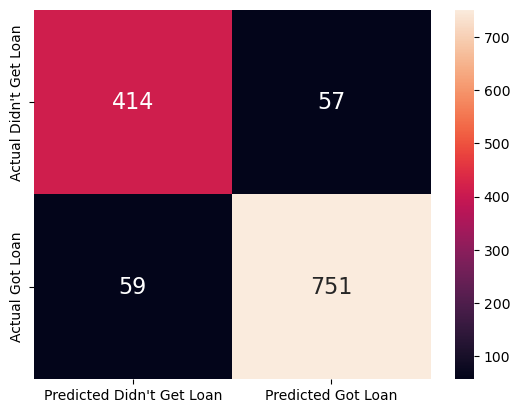

In [ ]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
conf_mat = confusion_matrix(y_test, predictions_lr)

conf_frame = pd.DataFrame(conf_mat,
                        columns=['Predicted Didn\'t Get Loan', 'Predicted Got Loan'],
                        index=['Actual Didn\'t Get Loan', 'Actual Got Loan'])

sns.heatmap(conf_frame, annot=True, fmt='d', annot_kws={"size": 16})
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
lr_accuracy = accuracy_score(y_test, predictions_lr)

print('Accuracy:', lr_accuracy*100, '%')

Accuracy: 90.94457455113194 %


In [ ]:
y_test.count()

1281

In [ ]:
from sklearn.metrics import precision_score

# Calculate the percision
lr_precision = precision_score(y_test, predictions_lr, average='weighted')

print('Precision:', lr_precision*100, '%')

Precision: 90.95303531224536 %


In [ ]:
from sklearn.metrics import recall_score

# Calculate the recall
lr_recall = recall_score(y_test, predictions_lr, average='weighted')

print('Recall:', lr_recall*100, '%')

Recall: 90.94457455113194 %


In [ ]:
from sklearn.metrics import f1_score

# Calculate the F1 score
lr_f1 = f1_score(y_test, predictions_lr, average='weighted')

print('F1 score:', lr_f1*100, '%')

F1 score: 90.94857048456129 %


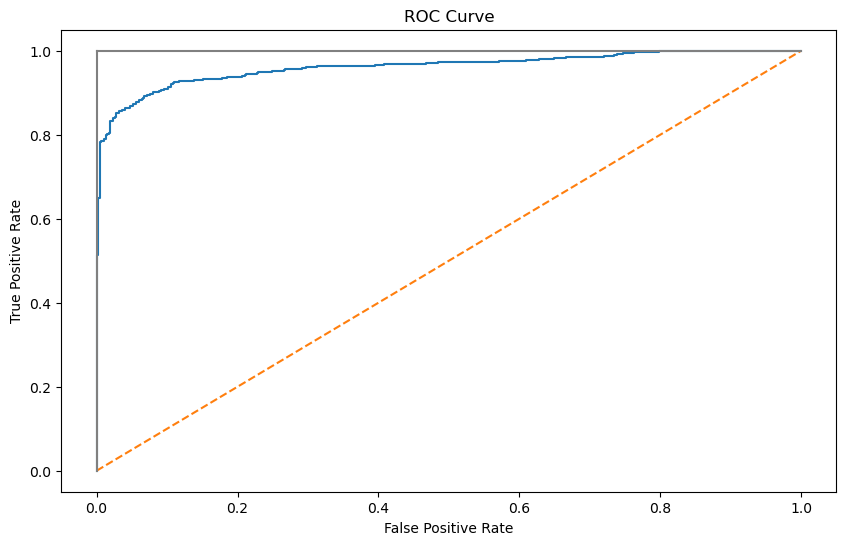

ROC AUC: 96.13378417341616 %


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get the predicted probabilities
y_pred_prob = log_model.predict_proba(X_test_pca)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_prob)

roc_auc = auc(false_positive_rate, true_positive_rate)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0], c='.5')
plt.plot([1,1], c='.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('ROC AUC:', roc_auc*100, '%')


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a random forest classifier

nb_model = GaussianNB()

# Train the model

nb_model.fit(X_train_pca, y_train)

# Make predictions on the test data

predictions_nb = nb_model.predict(X_test_pca)

predictions_nb

array([0., 1., 0., ..., 1., 0., 1.])

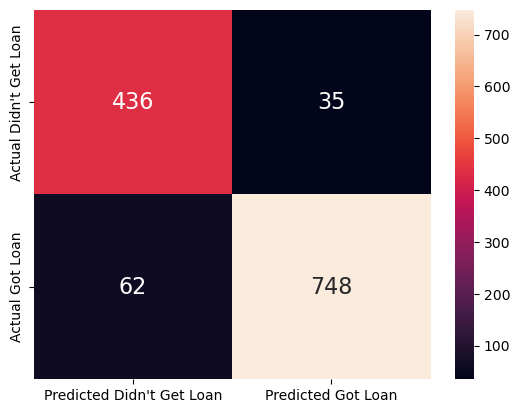

In [ ]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
conf_mat = confusion_matrix(y_test, predictions_nb)

conf_frame = pd.DataFrame(conf_mat,
                        columns=['Predicted Didn\'t Get Loan', 'Predicted Got Loan'],
                        index=['Actual Didn\'t Get Loan', 'Actual Got Loan'])

sns.heatmap(conf_frame, annot=True, fmt='d', annot_kws={"size": 16})
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
nb_accuracy = accuracy_score(y_test, predictions_nb)

print('Accuracy:', nb_accuracy*100, '%')

Accuracy: 92.42779078844653 %


In [ ]:
from sklearn.metrics import precision_score

# Calculate the percision
nb_precision = precision_score(y_test, predictions_nb, average='weighted')

print('Precision:', nb_precision*100, '%')

Precision: 92.59598354655803 %


In [ ]:
from sklearn.metrics import recall_score

# Calculate the recall
nb_recall = recall_score(y_test, predictions_nb, average='weighted')

print('Recall:', nb_recall*100, '%')

Recall: 92.42779078844653 %


In [ ]:
from sklearn.metrics import f1_score

# Calculate the F1 score
nb_f1 = f1_score(y_test, predictions_nb, average='weighted')

print('F1 score:', nb_f1*100, '%')

F1 score: 92.4691146987158 %


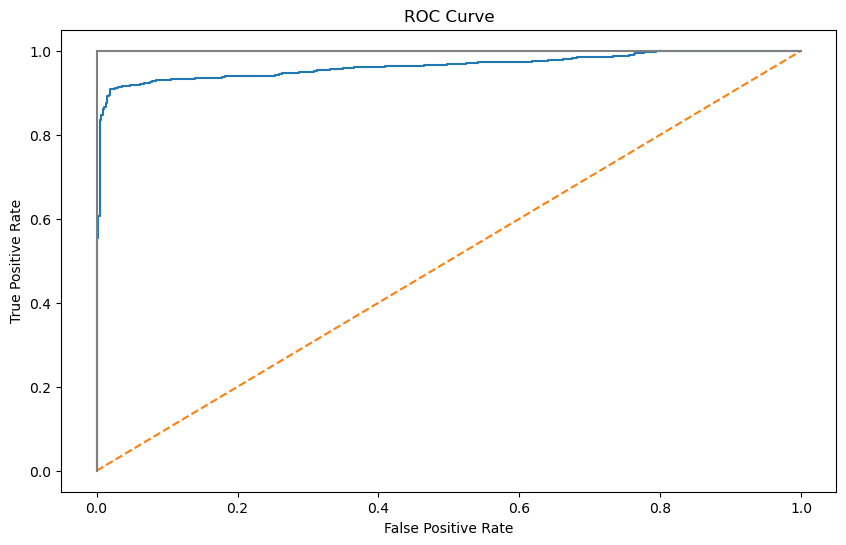

ROC AUC: 96.38567796388038 %


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get the predicted probabilities
y_pred_prob = nb_model.predict_proba(X_test_pca)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_prob)

roc_auc = auc(false_positive_rate, true_positive_rate)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0], c='.5')
plt.plot([1,1], c='.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('ROC AUC:', roc_auc*100, '%')


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)

# Train the model

rf_model.fit(X_train_pca, y_train)

# Make predictions on the test data

predictions_rf = rf_model.predict(X_test_pca)

predictions_rf

array([0., 1., 0., ..., 1., 0., 1.])

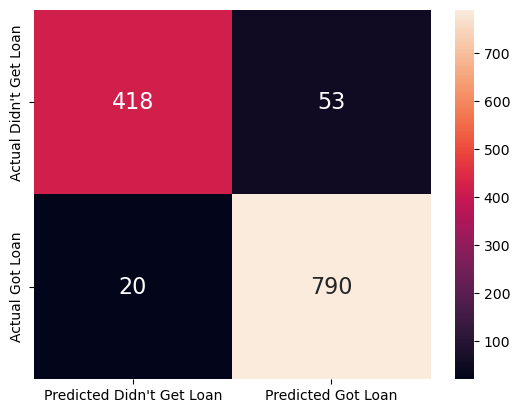

In [ ]:
# calculate the confusion matrix
conf_mat = confusion_matrix(y_test, predictions_rf)

conf_frame = pd.DataFrame(conf_mat,
                        columns=['Predicted Didn\'t Get Loan', 'Predicted Got Loan'],
                        index=['Actual Didn\'t Get Loan', 'Actual Got Loan'])

sns.heatmap(conf_frame, annot=True, fmt='d', annot_kws={"size": 16})
plt.show()

In [ ]:
# Calculate the accuracy
rf_accuracy = accuracy_score(y_test, predictions_rf)

print('Accuracy:', rf_accuracy*100, '%')

Accuracy: 94.30132708821233 %


In [ ]:
# Calculate the percision
rf_precision = precision_score(y_test, predictions_rf, average='weighted')

print('Precision:', rf_precision*100, '%')

Precision: 94.34565837478665 %


In [ ]:
# Calculate the recall
rf_recall = recall_score(y_test, predictions_rf, average='weighted')

print('Recall:', rf_recall*100, '%')

Recall: 94.30132708821233 %


In [ ]:
# Calculate the F1 score
rf_f1 = f1_score(y_test, predictions_rf, average='weighted')

print('F1 score:', rf_f1*100, '%')

F1 score: 94.25476913566474 %


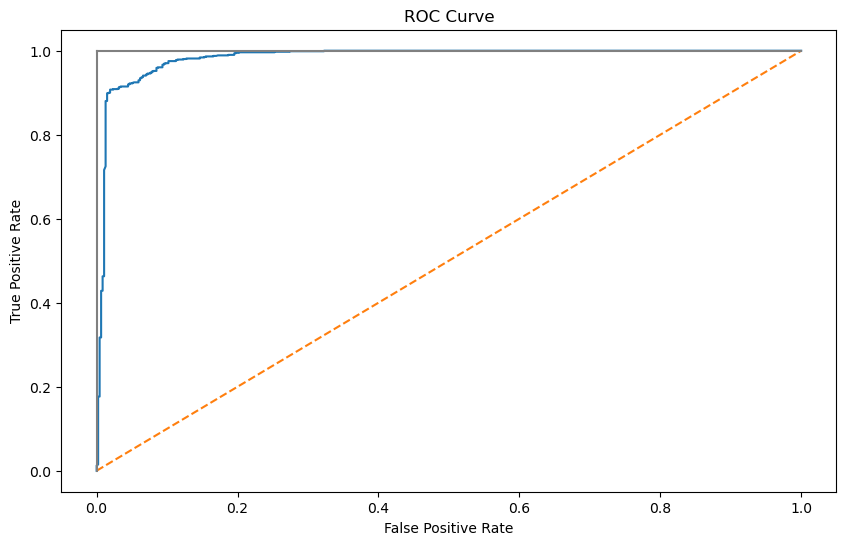

ROC AUC: 98.3773688763073 %


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get the predicted probabilities
y_pred_prob = rf_model.predict_proba(X_test_pca)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_prob)

roc_auc = auc(false_positive_rate, true_positive_rate)

# Plot ROC curve
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0], c='.5')
plt.plot([1,1], c='.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('ROC AUC:', roc_auc*100, '%')


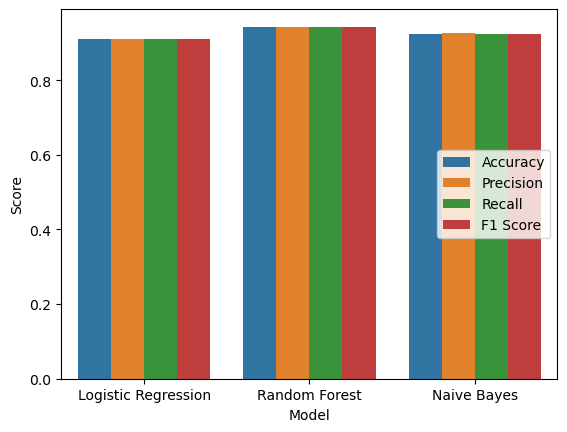

In [ ]:
metrics_df = pd.DataFrame({ 'Model' : ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Naive Bayes'],
                            'Metric' : ['Accuracy', 'Accuracy', 'Accuracy', 'Precision', 'Precision', 'Precision', 'Recall', 'Recall', 'Recall', 'F1 Score', 'F1 Score', 'F1 Score'],
                            'Score' : [lr_accuracy, rf_accuracy, nb_accuracy, lr_precision, rf_precision, nb_precision, lr_recall, rf_recall, nb_recall, lr_f1, rf_f1, nb_f1]})

sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_df)
plt.legend(loc='center right')
plt.show()

### SVM FOR PCA

In [ ]:
from sklearn.svm import SVC

svc_model = SVC(probability=True)

svc_model.fit(X_train_pca, y_train)

y_pred_pca = svc_model.predict(X_test_pca)

y_pred_pca

array([0., 1., 0., ..., 1., 0., 1.])

In [ ]:
from sklearn.metrics import classification_report

svm_report = classification_report(y_test,y_pred_pca)

print(svm_report)

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       471
         1.0       0.95      0.92      0.93       810

    accuracy                           0.92      1281
   macro avg       0.91      0.92      0.91      1281
weighted avg       0.92      0.92      0.92      1281

